In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline


In [2]:
## modules version

print 'numpy : ',np.__version__
print 'xarray : ',xr.__version__
print 'matplotlib : ',matplotlib.__version__


numpy :  1.11.2
xarray :  0.10.4
matplotlib :  2.2.2


In [3]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [4]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/box1/'
wbuoyfile_filt = database + 'NATL60box1-CJM165_y2013m03d01.1d_wbuoy1-139_filt-n80-f0.0125.nc'
mldfile = database + 'NATL60box1-CJM165_y2013m03d01.1d_somxl010.nc'

database2 = '/media/extra/DATA/NATL60/NATL60-CJM165-S/filt-3D/'
wbuoyfile2_filt = database2 + 'NATL60box1-CJM165_y2013m03d01.1d_wbuoy_filt-n80-f0.0125.nc'

maskfile= '/media/extra/DATA/NATL60/NATL60-I/NATL60box1-CJM165.1d_mask_filt-n80-f0.0125.nc'

In [5]:
depwb=xr.open_dataset(wbuoyfile_filt)['deptht']
depwb2=xr.open_dataset(wbuoyfile2_filt)['deptht']

In [6]:
wbuoy_box11=xr.open_dataset(wbuoyfile_filt)['wbuoy']
wbuoy2_box11=xr.open_dataset(wbuoyfile2_filt)['wbuoy']
mld=xr.open_dataset(mldfile)['somxl010']

In [7]:
mask=xr.open_dataset(maskfile)['tmask']

In [8]:
wbuoy_box11.shape

(1, 139, 758, 601)

In [9]:
wbuoy2_box11.shape

(1, 139, 758, 601)

In [10]:
mld.shape

(1, 758, 601)

In [11]:
mask.shape

(1, 300, 758, 601)

In [12]:
depwb.shape

(139,)

In [13]:
mean_wbuoy_box11=np.nanmean(np.nanmean(wbuoy_box11[0,:,:,:],1),1)
mean_wbuoy2_box11=np.nanmean(np.nanmean(wbuoy2_box11[0,:,:,:],1),1)
mean_mld=np.nanmean(mld[0,:,:])

In [14]:
mean_wbuoy_box11.shape

(139,)

In [15]:
mean_wbuoy2_box11.shape

(139,)

In [16]:
mean_mld

117.4593

In [17]:
mean_wbuoy_box11

array([  1.19774954e-11,   1.63482994e-09,   3.50086982e-09,
         5.63672442e-09,   7.96854049e-09,   1.05997318e-08,
         1.33570586e-08,   1.62822005e-08,   1.93911749e-08,
         2.26337260e-08,   2.59695447e-08,   2.94009759e-08,
         3.29136292e-08,   3.63399373e-08,   3.96247195e-08,
         4.27188169e-08,   4.54431621e-08,   4.77545079e-08,
         4.96181585e-08,   5.09643314e-08,   5.18288381e-08,
         5.22095469e-08,   5.21725134e-08,   5.16525311e-08,
         5.08633882e-08,   4.96497066e-08,   4.80928470e-08,
         4.62234695e-08,   4.41042829e-08,   4.18339461e-08,
         3.94688371e-08,   3.69904818e-08,   3.44418787e-08,
         3.18755724e-08,   2.92946876e-08,   2.66325539e-08,
         2.38768401e-08,   2.11709246e-08,   1.86050375e-08,
         1.62099987e-08,   1.39868739e-08,   1.19405348e-08,
         1.00845874e-08,   8.40256575e-09,   6.87569424e-09,
         5.50906876e-09,   4.33850555e-09,   3.34172157e-09,
         2.54362598e-09,

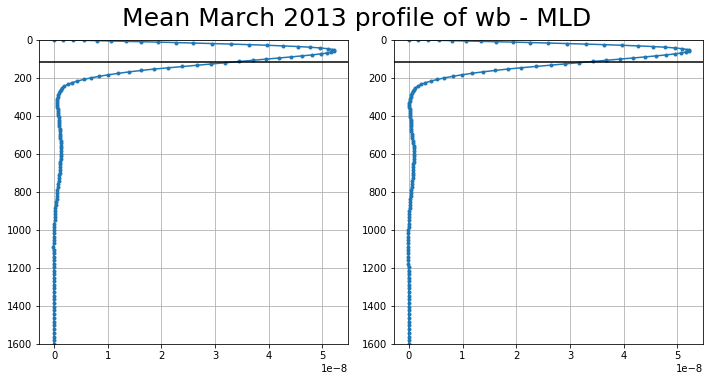

In [18]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs = axs.ravel()
title = 'Mean March 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)

axs[0].plot(mean_wbuoy_box11,depwb,'C0.-')
axs[0].grid(True)
axs[0].set_ylim(1600,0)
#axs[0].set_xlim(-5e-6,5e-6)
axs[0].axhline(y=mean_mld,color='k')
fig.tight_layout()

axs[1].plot(mean_wbuoy2_box11,depwb2,'C0.-')
axs[1].grid(True)
axs[1].set_ylim(1600,0)
#axs[1].set_xlim(-4e-8,3e-8)
axs[1].axhline(y=mean_mld,color='k')
fig.tight_layout()


In [21]:
def make_prof(k):
    dd=str(k+1).zfill(2)
    database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/box11/'
    wbuoyfile_filt = database + 'NATL60box1-CJM165_y2013m03d'+str(dd)+'.1d_wbuoy_filt-n80-f0.0125.nc'
    mldfile = database + 'NATL60box1-CJM165_y2013m03d'+str(dd)+'.1d_somxl010.nc'

    database2 = '/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/'
    wbuoyfile2_filt = database2 + 'NATL60box1-CJM165_y2013m03d'+str(dd)+'.1d_wbuoy_filt-n80-f0.0125.nc'

    depwb=xr.open_dataset(wbuoyfile_filt)['deptht']
    depwb2=xr.open_dataset(wbuoyfile2_filt)['deptht']
    wbuoy_box11=xr.open_dataset(wbuoyfile_filt)['wbuoy']
    wbuoy2_box11=xr.open_dataset(wbuoyfile2_filt)['wbuoy']
    mld=xr.open_dataset(mldfile)['somxl010']
    
    mean_wbuoy_box11=np.nanmean(np.nanmean(wbuoy_box11[0,:,:,:],1),1)
    mean_wbuoy2_box11=np.nanmean(np.nanmean(wbuoy2_box11[0,:,:,:],1),1)
    mean_mld=np.nanmean(mld[0,:,:])
 
    fig, axs = plt.subplots(1,2, figsize=(10, 5))
    axs = axs.ravel()
    title = str(dd) + 'March 2013 profile of wb - MLD'
    plt.suptitle(title,size = 25,y=1.05)

    axs[0].plot(mean_wbuoy_box11,depwb,'C0.-')
    axs[0].grid(True)
    axs[0].set_ylim(1600,0)
    axs[0].set_xlim(-0.5e-8,3e-8)
    axs[0].axhline(y=mean_mld,color='k')
    fig.tight_layout()

    axs[1].plot(mean_wbuoy2_box11,depwb2,'C0.-')
    axs[1].grid(True)
    axs[1].set_ylim(1600,0)
    axs[1].set_xlim(-4e-8,3e-8)
    axs[1].axhline(y=mean_mld,color='k')
    fig.tight_layout()

    

In [22]:
make_prof(0)

IOError: [Errno 2] No such file or directory: '/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60box11-CJM165_y2013m03d01.1d_wbuoy_filt-n80-f0.0125.nc'

/home/albert/anaconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/albert/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


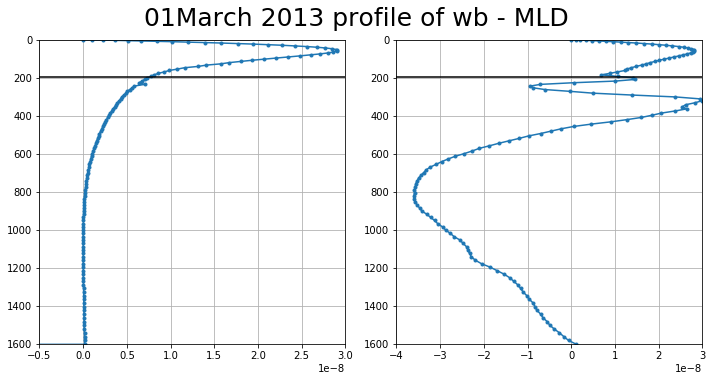

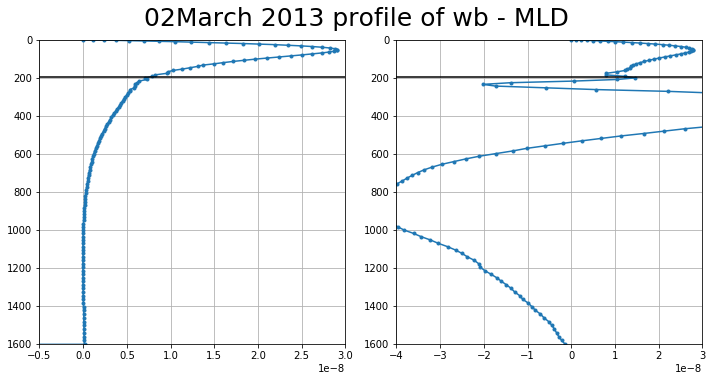

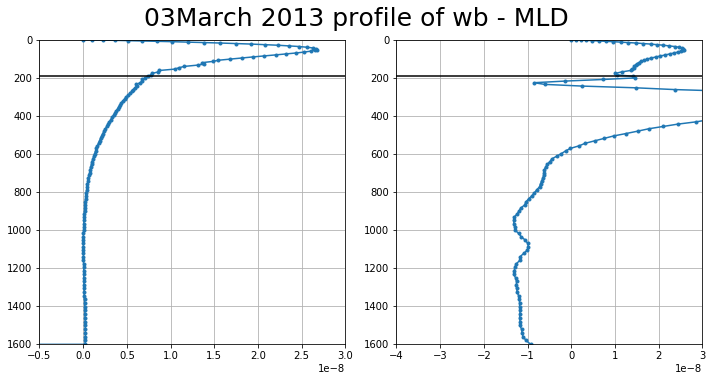

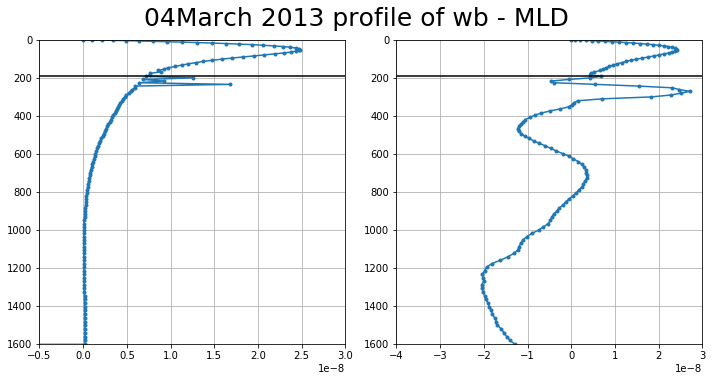

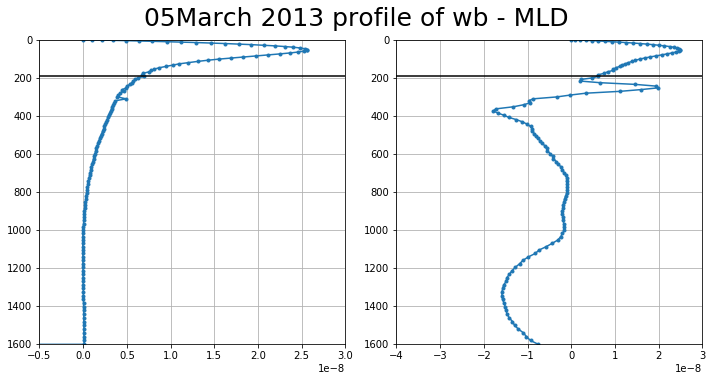

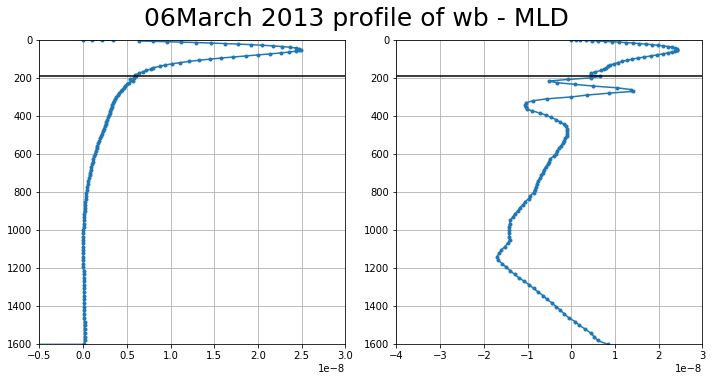

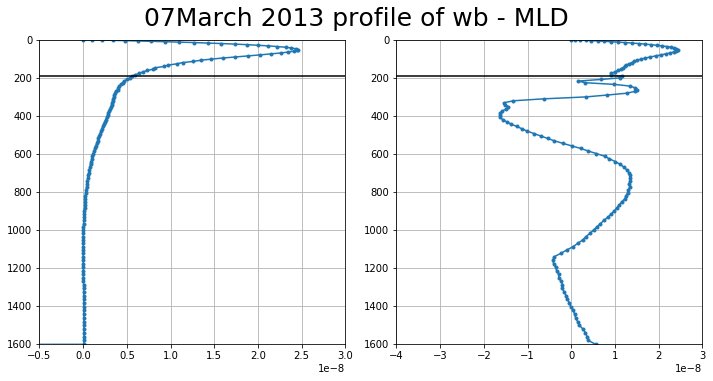

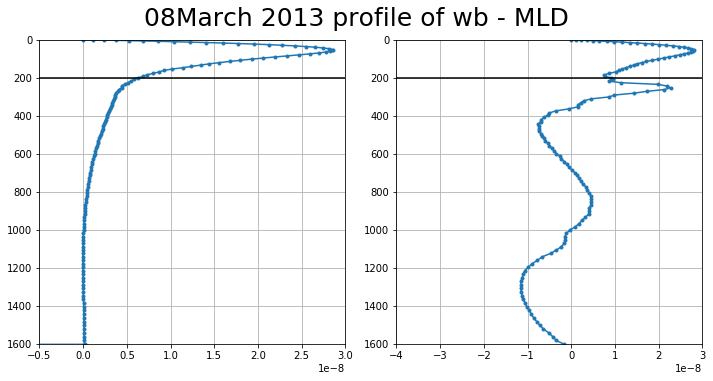

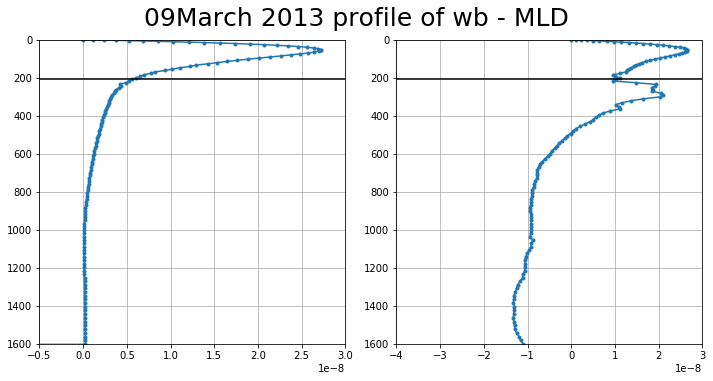

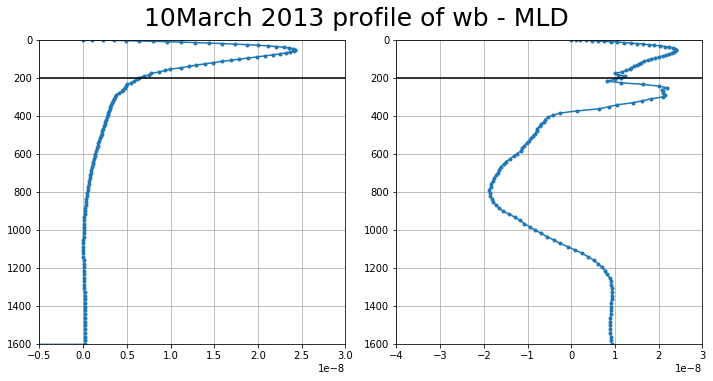

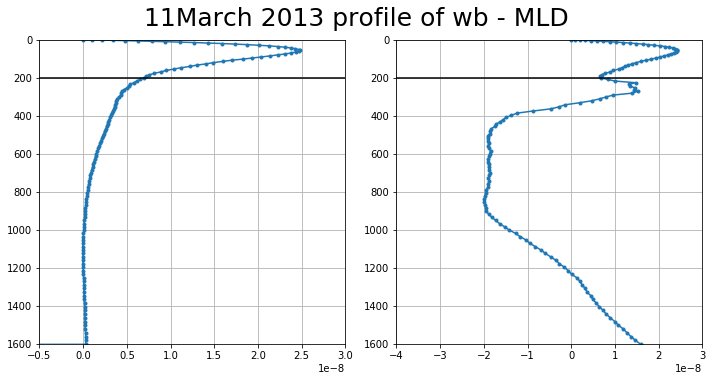

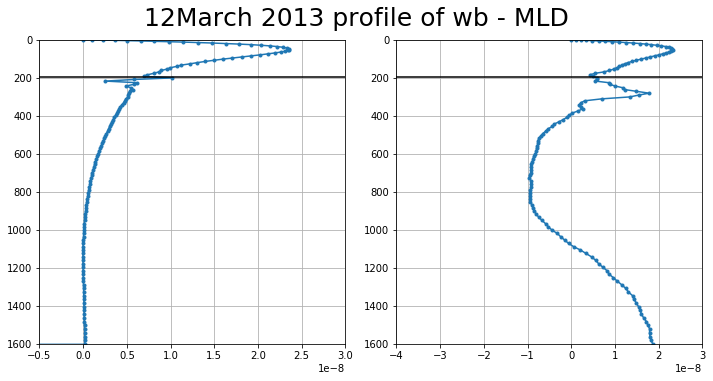

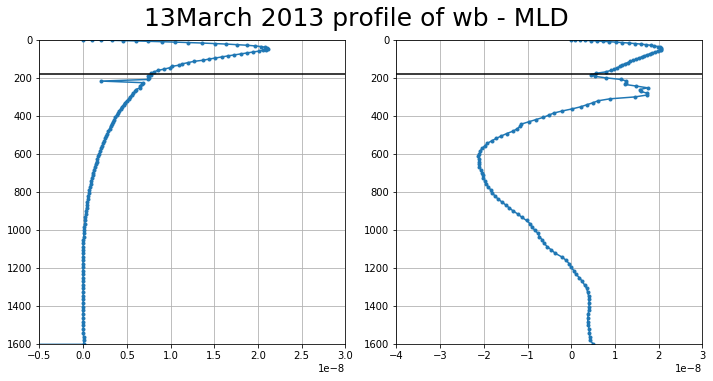

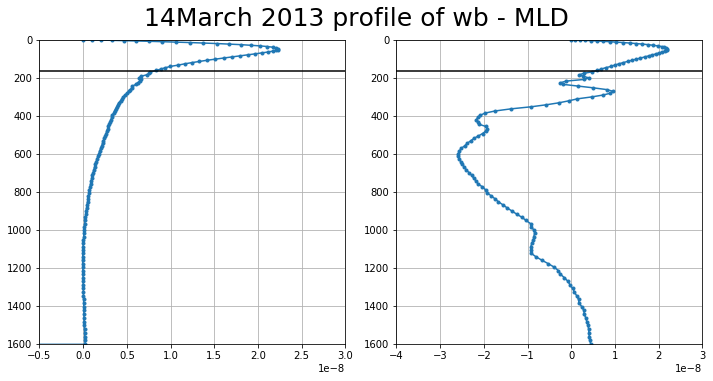

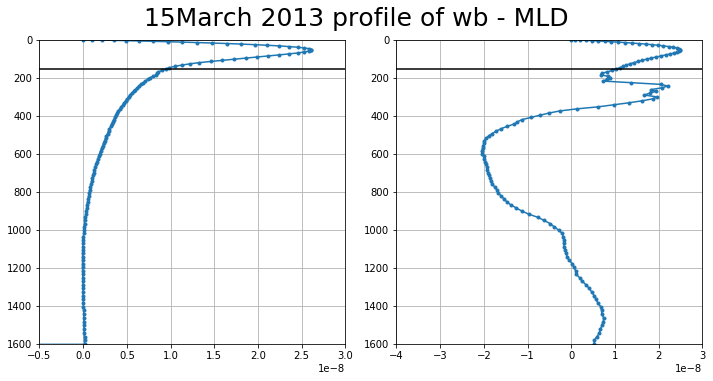

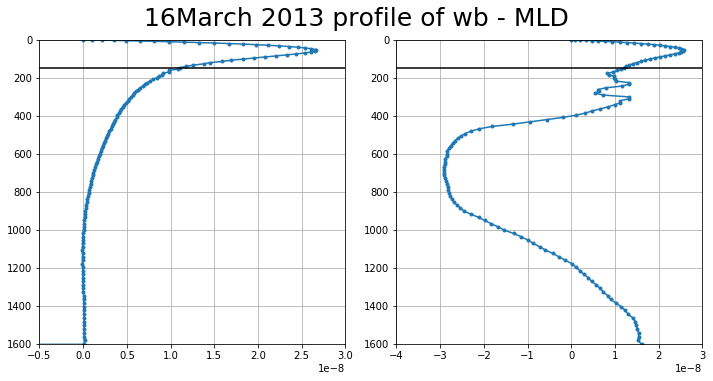

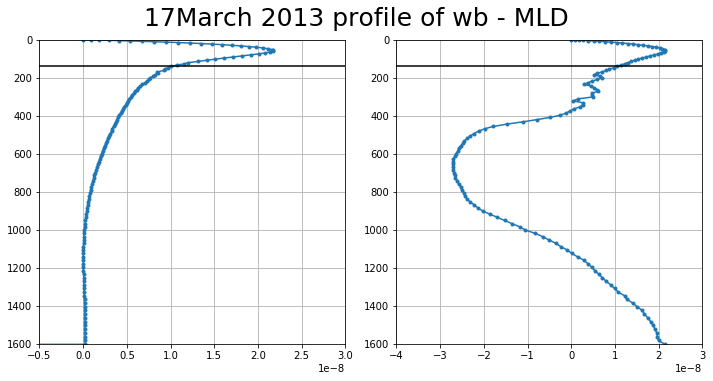

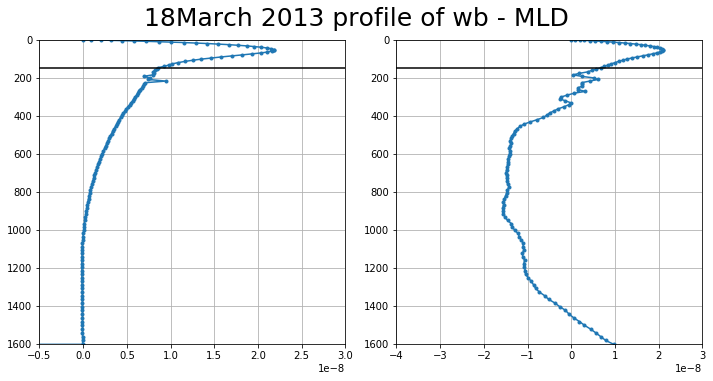

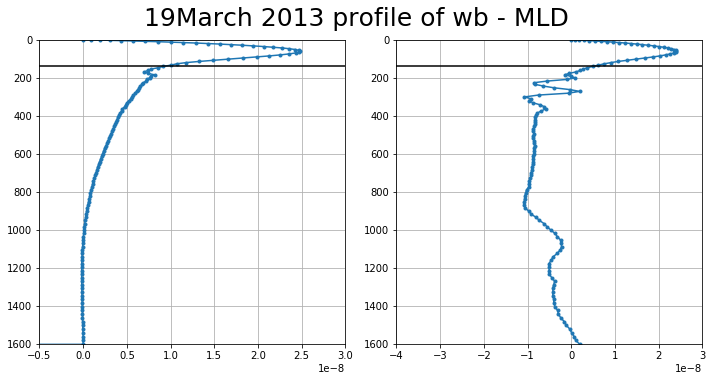

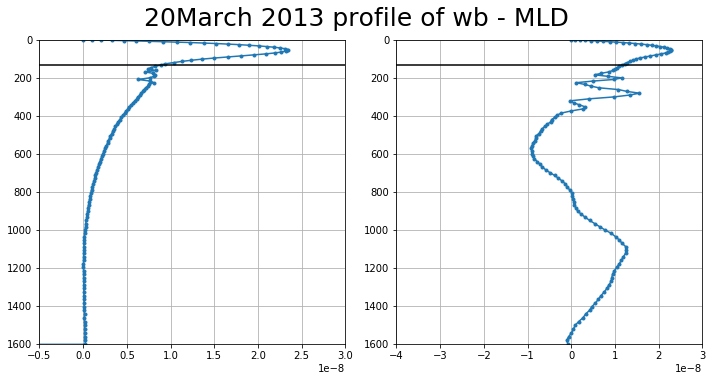

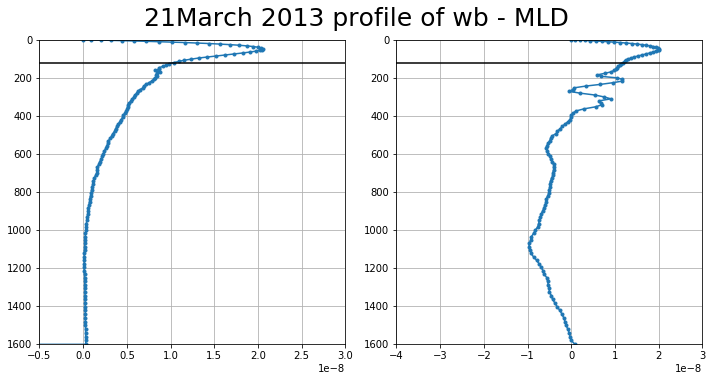

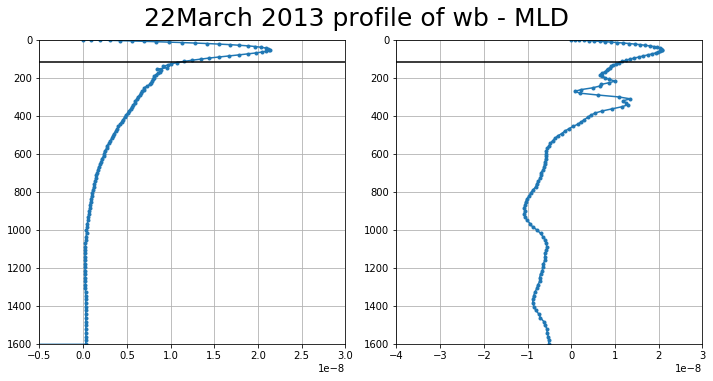

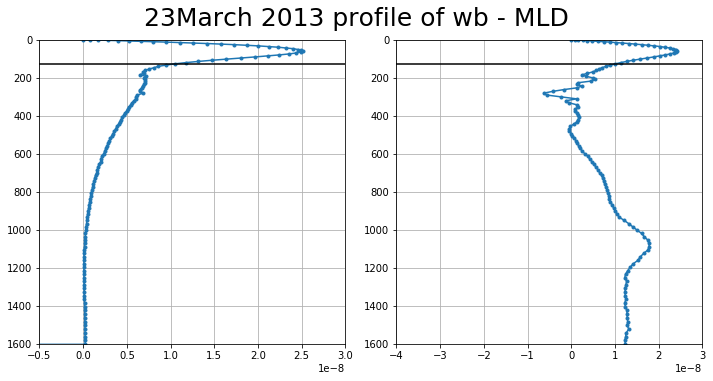

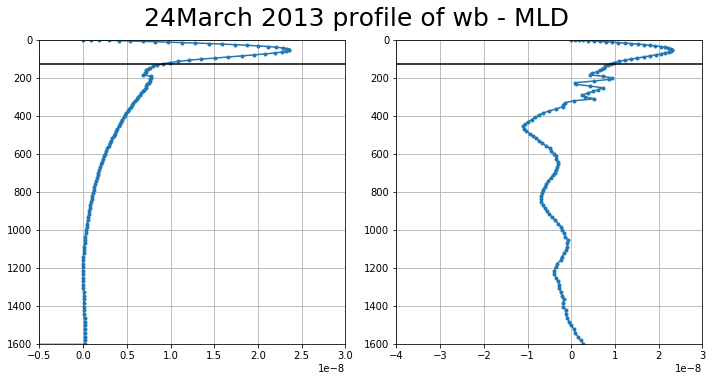

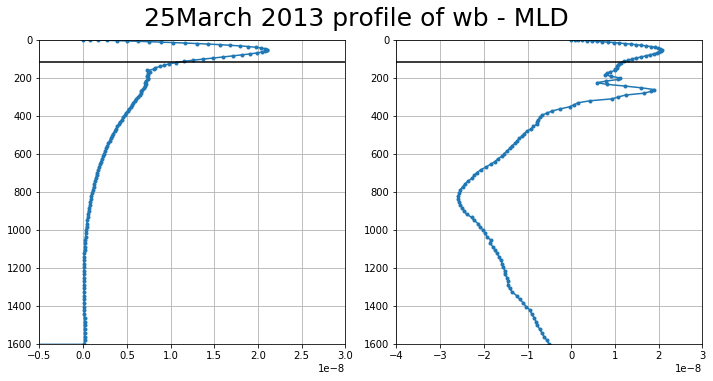

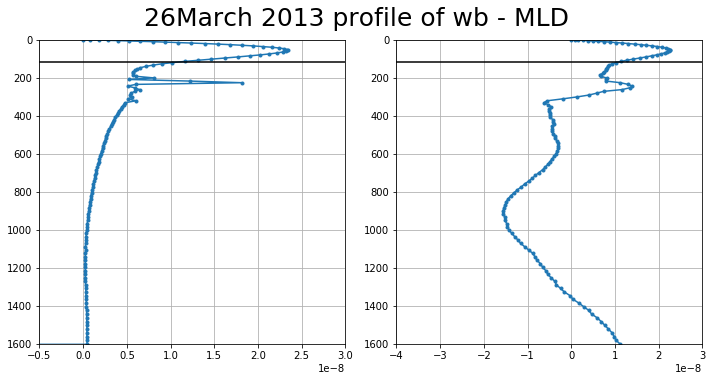

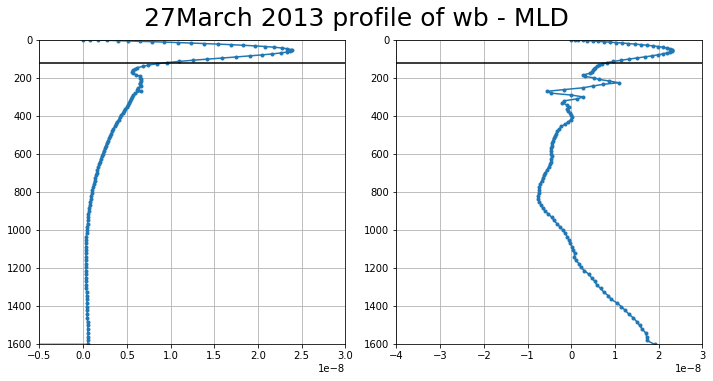

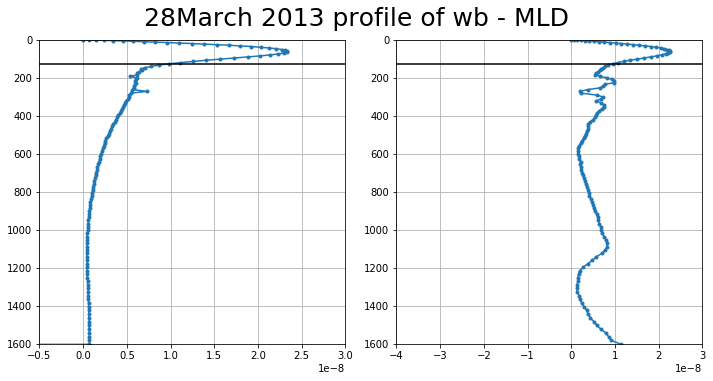

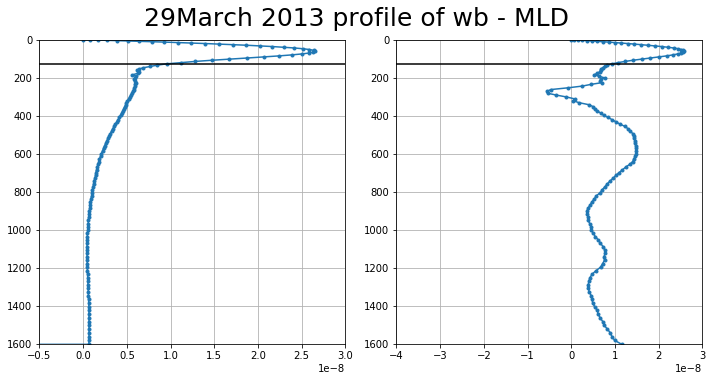

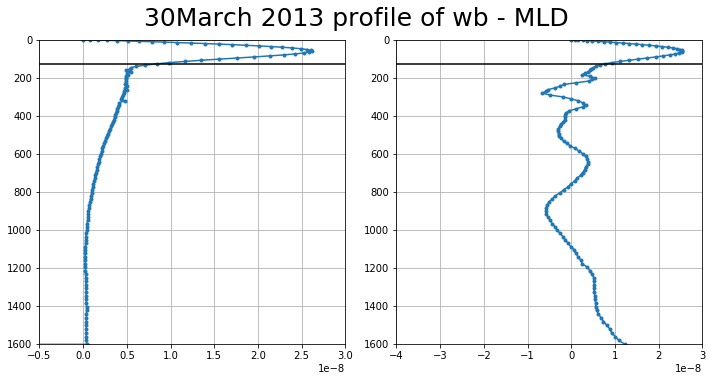

In [32]:
for k in np.arange(30):
    make_prof(k)